<a href="https://colab.research.google.com/github/SarbajitPbappy/CodingWithMe/blob/main/Big_data_lab_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Modules

In [ ]:
import os
import numpy as np
import tensorflow as tf
from keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Histogram  equalization

In [ ]:
import os

def apply_clahe_to_image(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Create a CLAHE object
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    # Convert the image to LAB color space
    lab_img = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab_img)

    # Apply CLAHE to the L channel
    cla = clahe.apply(l)

    # Merge the CLAHE-enhanced L channel back with the original A and B channels
    clahe_img = cv2.merge((cla, a, b))

    # Convert the LAB image back to BGR color space
    clahe_img = cv2.cvtColor(clahe_img, cv2.COLOR_LAB2BGR)

    return clahe_img

# List of input and output folders for 5 classes
classes = ['Amloki', 'Arjuna', 'Neem', 'Thankuni', 'Tulsi']

for class_name in classes:
    # Input folder for each class
    image_folder = f'/content/drive/MyDrive/Academic/Medicinal Leaf/train/{class_name}'

    # Output folder for each class
    output_folder = f'/content/drive/MyDrive/Academic/Medicinal Leaf/Pre-processed data/hitogram/{class_name}'

    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Process each image in the folder and save the results
    for file_name in os.listdir(image_folder):
        # Construct the full path for each image
        image_path = os.path.join(image_folder, file_name)

        # Check if the item in the folder is a file
        if os.path.isfile(image_path):
            # Process the image
            processed_image = apply_clahe_to_image(image_path)

            # Construct the output file path
            output_path = os.path.join(output_folder, file_name)

            # Save the processed image
            cv2.imwrite(output_path, processed_image)



In [ ]:

# Original image path
original_image_path = "/content/drive/MyDrive/Academic/Medicinal Leaf/train/Arjuna/IMG_0820.jpg"

# Processed image path
processed_image_path = "/content/drive/MyDrive/Academic/Medicinal Leaf/Pre-processed data/hitogram/Arjuna/IMG_0820.jpg"

# Read the original and processed images
original_image = cv2.imread(original_image_path)
processed_image = cv2.imread(processed_image_path)

# Display the original and processed images side by side
stacked_image = np.hstack((original_image, processed_image))
cv2_imshow(stacked_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Gamma Correction

In [ ]:

def apply_clahe_to_image(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Create a CLAHE object
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    # Convert the image to LAB color space
    lab_img = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab_img)

    # Apply CLAHE to the L channel
    cla = clahe.apply(l)

    # Merge the CLAHE-enhanced L channel back with the original A and B channels
    clahe_img = cv2.merge((cla, a, b))

    # Convert the LAB image back to BGR color space
    clahe_img = cv2.cvtColor(clahe_img, cv2.COLOR_LAB2BGR)

    return clahe_img

def apply_gamma_correction(image_path, gamma=1.0):
    # Read the image
    image = cv2.imread(image_path)

    # Apply gamma correction
    gamma_corrected = np.power(image / 255.0, gamma) * 255.0
    gamma_corrected = gamma_corrected.astype(np.uint8)

    return gamma_corrected

# List of input and output folders for 5 classes
classes = ['Amloki', 'Arjuna', 'Neem', 'Thankuni', 'Tulsi']

for class_name in classes:
    # Input folder for each class
    image_folder = f'/content/drive/MyDrive/Academic/Medicinal Leaf/train/{class_name}'

    # Output folder for CLAHE for each class(from histogram equalization)
    clahe_output_folder = f'/content/drive/MyDrive/Academic/Medicinal Leaf/Pre-processed data/hitogram/{class_name}'

    # Output folder for Gamma Correction for each class
    gamma_output_folder = f'/content/drive/MyDrive/Academic/Medicinal Leaf/Pre-processed data/Gamma_Correction/{class_name}'

    # Ensure the output folders exist
    os.makedirs(clahe_output_folder, exist_ok=True)
    os.makedirs(gamma_output_folder, exist_ok=True)

    # Process each image in the folder and save the results (CLAHE and Gamma Correction)
    for file_name in os.listdir(image_folder):
        # Construct the full path for each image
        image_path = os.path.join(image_folder, file_name)

        # Check if the item in the folder is a file
        if os.path.isfile(image_path):
            # Process the image using CLAHE
            clahe_processed_image = apply_clahe_to_image(image_path)

            # Process the image using Gamma Correction
            gamma_processed_image = apply_gamma_correction(image_path, gamma=1.5)  # You can adjust the gamma value

            # Construct the output file paths
            gamma_output_path = os.path.join(gamma_output_folder, file_name)

            # Save the processed images
            cv2.imwrite(gamma_output_path, gamma_processed_image)

In [ ]:
# Original image path
original_image_path = "/content/drive/MyDrive/Academic/Medicinal Leaf/Pre-processed data/hitogram/Arjuna/IMG_0820.jpg"

# Processed image path
processed_image_path = "/content/drive/MyDrive/Academic/Medicinal Leaf/Pre-processed data/Gamma_Correction/Arjuna/IMG_0820.jpg"

# Read the original and processed images
original_image = cv2.imread(original_image_path)
processed_image = cv2.imread(processed_image_path)

# Display the original and processed images side by side
stacked_image = np.hstack((original_image, processed_image))
cv2_imshow(stacked_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#Gaussian Noise and Filter

In [ ]:
# Function to apply Gaussian filter to an image
def apply_gaussian_filter(image, kernel_size=(3, 3)):
    filtered_image = cv2.GaussianBlur(image, kernel_size, 0)  # 0 is the standard deviation
    return filtered_image

# List of input and output folders for 5 classes
classes = ['Amloki', 'Arjuna', 'Neem', 'Thankuni', 'Tulsi']

for class_name in classes:
    # Input folder for each class
    gamma_output_folder = f'/content/drive/MyDrive/Academic/Medicinal Leaf/Pre-processed data/Gamma_Correction/{class_name}'

    # Output folder for Gaussian Noise and Filtering for each class
    gaussian_output_folder = f'/content/drive/MyDrive/Academic/Medicinal Leaf/Pre-processed data/Gaussian_Filter/{class_name}'

    # Ensure the output folder exists
    os.makedirs(gaussian_output_folder, exist_ok=True)

    # Process each image in the folder and save the results (Gaussian Noise and Filtering)
    for file_name in os.listdir(gamma_output_folder):
        # Construct the full path for each image after gamma correction
        gamma_processed_path = os.path.join(gamma_output_folder, file_name)

        # Check if the item in the folder is a file
        if os.path.isfile(gamma_processed_path):
            # Read the gamma-corrected image
            gamma_processed_image = cv2.imread(gamma_processed_path)

            # Apply Gaussian filter to the noisy image
            filtered_image = apply_gaussian_filter(gamma_processed_image)

            # Construct the output file path
            gaussian_output_path = os.path.join(gaussian_output_folder, file_name)

            # Save the processed image
            cv2.imwrite(gaussian_output_path, filtered_image)


In [ ]:
# Original image path
original_image_path = "/content/drive/MyDrive/Academic/Medicinal Leaf/Pre-processed data/hitogram/Arjuna/IMG_0820.jpg"

# Processed image path
processed_image_path = "/content/drive/MyDrive/Academic/Medicinal Leaf/Pre-processed data/Gaussian_Filter/Arjuna/IMG_0820.jpg"

# Read the original and processed images
original_image = cv2.imread(original_image_path)
processed_image = cv2.imread(processed_image_path)

# Display the original and processed images side by side
stacked_image = np.hstack((original_image, processed_image))
cv2_imshow(stacked_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Bilateral Filter

In [ ]:
# Function to apply Bilateral filter to an image
def apply_bilateral_filter(image, d=9, sigma_color=75, sigma_space=75):
    filtered_image = cv2.bilateralFilter(image, d, sigma_color, sigma_space)
    return filtered_image

# List of input and output folders for 5 classes
classes = ['Amloki', 'Arjuna', 'Neem', 'Thankuni', 'Tulsi']

for class_name in classes:
    # Input folder for each class
    gaussian_output_folder = f'/content/drive/MyDrive/Academic/Medicinal Leaf/Pre-processed data/Gaussian_Filter/{class_name}'

    # Output folder for Bilateral Filtering for each class
    bilateral_output_folder = f'/content/drive/MyDrive/Academic/Medicinal Leaf/Pre-processed data/Bilateral_Filter/{class_name}'

    # Ensure the output folder exists
    os.makedirs(bilateral_output_folder, exist_ok=True)

    # Process each image in the folder and save the results (Bilateral Filtering)
    for file_name in os.listdir(gaussian_output_folder):
        # Construct the full path for each image after gamma correction
        gamma_processed_path = os.path.join(gaussian_output_folder, file_name)

        # Check if the item in the folder is a file
        if os.path.isfile(gamma_processed_path):
            # Read the gamma-corrected image
            gamma_processed_image = cv2.imread(gamma_processed_path)

            # Apply Bilateral filter to the gamma-corrected image
            filtered_image = apply_bilateral_filter(gamma_processed_image)

            # Construct the output file path
            bilateral_output_path = os.path.join(bilateral_output_folder, file_name)

            # Save the processed image
            cv2.imwrite(bilateral_output_path, filtered_image)


In [ ]:
# Original image path
original_image_path = "/content/drive/MyDrive/Academic/Medicinal Leaf/Pre-processed data/Gaussian_Filter/Arjuna/IMG_0820.jpg"

# Processed image path
processed_image_path = "/content/drive/MyDrive/Academic/Medicinal Leaf/Pre-processed data/Bilateral_Filter/Arjuna/IMG_0820.jpg"

# Read the original and processed images
original_image = cv2.imread(original_image_path)
processed_image = cv2.imread(processed_image_path)

# Display the original and processed images side by side
stacked_image = np.hstack((original_image, processed_image))
cv2_imshow(stacked_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Load the image
image_path = '/content/drive/MyDrive/Academic/Pre-processed data/Gaussian_filter/IMG_0818.jpg'
image = cv2.imread(image_path)

output_folder = '/content/drive/MyDrive/Academic/Pre-processed data/Bilateral_filter'

# Apply bilateral filter
bilateral_filtered_image1 = cv2.bilateralFilter(image, d=15, sigmaColor=85, sigmaSpace=75)

# Extract the file name from the path
file_name = os.path.basename(image_path)

# Construct the output file path
output_path = os.path.join(output_folder, file_name)

# Save the processed image
cv2.imwrite(output_path, bilateral_filtered_image1)

stacked = np.hstack((image, bilateral_filtered_image1))
cv2_imshow(cv2.resize(stacked, None, fx=0.5, fy=0.5))

Fourier Transformation, Contrast stretching and Parametric transformation have been deleted

# Augmentation

In [ ]:
# Define the ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Define the folder path containing main images
amloki_image_folder_path = '/content/drive/MyDrive/Academic/Medicinal Leaf/train/Amloki'
arjuna_image_folder_path = '/content/drive/MyDrive/Academic/Medicinal Leaf/train/Arjuna'
neem_image_folder_path = '/content/drive/MyDrive/Academic/Medicinal Leaf/train/Neem'
thankuni_image_folder_path = '/content/drive/MyDrive/Academic/Medicinal Leaf/train/Thankuni'
tulsi_image_folder_path = '/content/drive/MyDrive/Academic/Medicinal Leaf/train/Tulsi'


# Create a directory to save the augmented images
amloki_output_folder_path = '/content/drive/MyDrive/Academic/Medicinal Leaf/Augmented_image/Amloki'
os.makedirs(amloki_output_folder_path, exist_ok=True)

arjuna_output_folder_path = '/content/drive/MyDrive/Academic/Medicinal Leaf/Augmented_image/Arjuna'
os.makedirs(arjuna_output_folder_path, exist_ok=True)

neem_output_folder_path = '/content/drive/MyDrive/Academic/Medicinal Leaf/Augmented_image/Neem'
os.makedirs(neem_output_folder_path, exist_ok=True)

thankuni_output_folder_path = '/content/drive/MyDrive/Academic/Medicinal Leaf/Augmented_image/Thankuni'
os.makedirs(thankuni_output_folder_path, exist_ok=True)

tulsi_output_folder_path = '/content/drive/MyDrive/Academic/Medicinal Leaf/Augmented_image/Tulsi'
os.makedirs(tulsi_output_folder_path, exist_ok=True)


# List all the images filenames in the folder
amloki_image_filenames = os.listdir(amloki_image_folder_path)
arjuna_image_filenames = os.listdir(arjuna_image_folder_path)
neem_image_filenames = os.listdir(neem_image_folder_path)
thankuni_image_filenames = os.listdir(thankuni_image_folder_path)
tulsi_image_filenames = os.listdir(tulsi_image_folder_path)

# Loop through each image in the folder and apply augmentation
for file_index in range(len(tulsi_image_filenames)):
  # Augmentation for amloki images
  if amloki_image_filenames[file_index].endswith(('.jpg', '.jpeg', '.png', '.bmp')):
    amloki_img_path = os.path.join(amloki_image_folder_path, amloki_image_filenames[file_index])
    img = load_img(amloki_img_path, target_size=(150, 150))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Generate augmented images
    i = 0
    for batch in datagen.flow(x, batch_size=1):
      amloki_augmented_img = array_to_img(batch[0])
      # Save the augmented image
      output_filename = f"augmented_{amloki_image_filenames[file_index]}_{i}.jpg"
      output_path = os.path.join(amloki_output_folder_path, output_filename)
      amloki_augmented_img.save(output_path)

      i += 1
      if i >= 15:  # number of augmented versions as needed
          break


  # Arjuna image augmentation
  if arjuna_image_filenames[file_index].endswith(('.jpg', '.jpeg', '.png', '.bmp')):
    arjuna_img_path = os.path.join(arjuna_image_folder_path, arjuna_image_filenames[file_index])
    img = load_img(arjuna_img_path, target_size=(150, 150))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Generate augmented images
    i = 0
    for batch in datagen.flow(x, batch_size=1):
      arjuna_augmented_img = array_to_img(batch[0])
      # Save the augmented image
      output_filename = f"augmented_{arjuna_image_filenames[file_index]}_{i}.jpg"
      output_path = os.path.join(arjuna_output_folder_path, output_filename)
      arjuna_augmented_img.save(output_path)

      i += 1
      if i >= 15:  # number of augmented versions as needed
          break


  # Thankuni image augmentation
  if thankuni_image_filenames[file_index].endswith(('.jpg', '.jpeg', '.png', '.bmp')):
    thankuni_img_path = os.path.join(thankuni_image_folder_path, thankuni_image_filenames[file_index])
    img = load_img(thankuni_img_path, target_size=(150, 150))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Generate augmented images
    i = 0
    for batch in datagen.flow(x, batch_size=1):
      thankuni_augmented_img = array_to_img(batch[0])
      # Save the augmented image
      output_filename = f"augmented_{thankuni_image_filenames[file_index]}_{i}.jpg"
      output_path = os.path.join(thankuni_output_folder_path, output_filename)
      thankuni_augmented_img.save(output_path)

      i += 1
      if i >= 15:  # number of augmented versions as needed
          break


  # neem image augmentation
  if neem_image_filenames[file_index].endswith(('.jpg', '.jpeg', '.png', '.bmp')):
    neem_img_path = os.path.join(neem_image_folder_path, neem_image_filenames[file_index])
    img = load_img(neem_img_path, target_size=(150, 150))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Generate augmented images
    i = 0
    for batch in datagen.flow(x, batch_size=1):
      neem_augmented_img = array_to_img(batch[0])
      # Save the augmented image
      output_filename = f"augmented_{neem_image_filenames[file_index]}_{i}.jpg"
      output_path = os.path.join(neem_output_folder_path, output_filename)
      neem_augmented_img.save(output_path)

      i += 1
      if i >= 15:  # number of augmented versions as needed
          break

  # tulsi image augmentation
  if tulsi_image_filenames[file_index].endswith(('.jpg', '.jpeg', '.png', '.bmp')):
    tulsi_img_path = os.path.join(tulsi_image_folder_path, tulsi_image_filenames[file_index])
    img = load_img(tulsi_img_path, target_size=(150, 150))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Generate augmented images
    i = 0
    for batch in datagen.flow(x, batch_size=1):
      tulsi_augmented_img = array_to_img(batch[0])
      # Save the augmented image
      output_filename = f"augmented_{tulsi_image_filenames[file_index]}_{i}.jpg"
      output_path = os.path.join(tulsi_output_folder_path, output_filename)
      tulsi_augmented_img.save(output_path)

      i += 1
      if i >= 15:  # number of augmented versions as needed
          break


amloki_image_aug_files = os.listdir(amloki_output_folder_path)
print("amloki image count : ", len(amloki_image_aug_files))

arjuna_image_aug_files = os.listdir(arjuna_output_folder_path)
print("arjuna image count : ", len(arjuna_image_aug_files))

thankuni_image_aug_files = os.listdir(thankuni_output_folder_path)
print("thankuni image count : ", len(thankuni_image_aug_files))

neem_image_aug_files = os.listdir(neem_output_folder_path)
print("neem image count : ", len(neem_image_aug_files))

tulsi_image_aug_files = os.listdir(tulsi_output_folder_path)
print("tulsi image count : ", len(tulsi_image_aug_files))

amloki image count :  1830
arjuna image count :  1830
thankuni image count :  1830
neem image count :  1830
tulsi image count :  1815


# Image Segmentation

In [ ]:
def extract_bv(image):
    b, green_seg_img, r = cv2.split(image)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    contrast_enhanced_green_seg_img = clahe.apply(green_seg_img)
    # applying alternate sequential filtering (3 times closing opening)
    r1 = cv2.morphologyEx(contrast_enhanced_green_seg_img, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
    R1 = cv2.morphologyEx(r1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
    r2 = cv2.morphologyEx(R1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
    R2 = cv2.morphologyEx(r2, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
    r3 = cv2.morphologyEx(R2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)
    R3 = cv2.morphologyEx(r3, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)
    f4 = cv2.subtract(R3,contrast_enhanced_green_seg_img)
    f5 = clahe.apply(f4)

    ret, f6 = cv2.threshold(f5,15,255,cv2.THRESH_BINARY)
    mask = np.ones(f5.shape[:2], dtype="uint8") * 255
    contours, hierarchy = cv2.findContours(f6.copy() ,cv2.RETR_LIST ,cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
      if cv2.contourArea(cnt) <= 200:
        cv2.drawContours(mask, [cnt], -1, 0, -1)
    im = cv2.bitwise_and(f5, f5, mask=mask)
    ret,fin = cv2.threshold(im,15,255,cv2.THRESH_BINARY_INV)
    newfin = cv2.erode(fin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)

    seg_img_eroded = cv2.bitwise_not(newfin)
    xmask = np.ones(image.shape[:2], dtype="uint8") * 255
    xcontours, xhierarchy = cv2.findContours(seg_img_eroded.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    for cnt in xcontours:
      shape = "unidentified"
      peri = cv2.arcLength(cnt, True)
      approx = cv2.approxPolyDP(cnt, 0.04 * peri, False)
      if len(approx) > 4 and cv2.contourArea(cnt) <= 3000 and cv2.contourArea(cnt) >= 100:
        shape = "circle"
      else:
        shape = "veins"
      if(shape=="circle"):
        cv2.drawContours(xmask, [cnt], -1, 0, -1)

    finimage = cv2.bitwise_and(seg_img_eroded,seg_img_eroded,mask=xmask)
    blood_vessels = cv2.bitwise_not(finimage)
    return blood_vessels

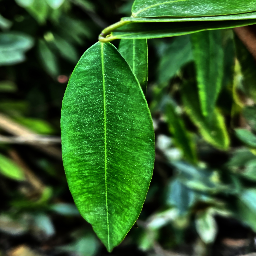

In [ ]:
seg_image = cv2.imread('/content/drive/MyDrive/Academic/Pre-processed data/Bilateral_filter/IMG_0818.jpg')

bloodvessel = extract_bv(seg_image)
seg_image_resize = cv2.resize(seg_image, (256, 256))
cv2_imshow(seg_image_resize)

In [ ]:
seg_image_resize.shape

(256, 256, 3)

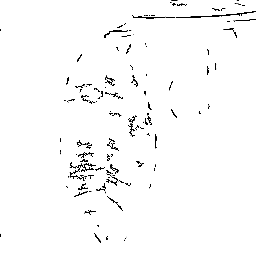

In [ ]:
vessel_resize = cv2.resize(bloodvessel, (256, 256))
cv2_imshow(vessel_resize)

# Feature Extraction

In [ ]:
!pip install pyfeats

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 7.8 MB/s eta 0:00:00
  Created wheel for pyfeats: filename=pyfeats-1.0.1-py3-none-any.whl size=49759 sha256=93146e90c1dc11a2d75e8a678a6b8a6b6feae137ba85ab0a544747add0e1d443
  Stored in directory: /root/.cache/pip/wheels/00/c9/c5/4d3a5cf39f7bb3bae26281c49868a4bd56f9dbbde8f919dce4
Successfully built pyfeats


In [ ]:
import pyfeats

In [ ]:
arjuna_gray = cv2.cvtColor(seg_image_resize, cv2.COLOR_BGR2GRAY)
arjuna_gray.shape

(256, 256)

# First Order Statistics/Statistical Features (FOS/SF)

In [ ]:
features, labels = pyfeats.fos(arjuna_gray, vessel_resize)

In [ ]:
features

array([7.45060826e+01, 2.92952763e+03, 6.90000000e+01, 4.00000000e+00,
       5.58973694e-01, 2.62942260e+00, 6.31753300e-03, 5.23069737e+00,
       0.00000000e+00, 2.47000000e+02, 1.11489204e-01, 8.00000000e+00,
       2.60000000e+01, 1.11000000e+02, 1.49000000e+02, 1.41000000e+02])

In [ ]:
labels

['FOS_Mean',
 'FOS_Variance',
 'FOS_Median',
 'FOS_Mode',
 'FOS_Skewness',
 'FOS_Kurtosis',
 'FOS_Energy',
 'FOS_Entropy',
 'FOS_MinimalGrayLevel',
 'FOS_MaximalGrayLevel',
 'FOS_CoefficientOfVariation',
 'FOS_10Percentile',
 'FOS_25Percentile',
 'FOS_75Percentile',
 'FOS_90Percentile',
 'FOS_HistogramWidth']

# Gray Level Co-occurence Matrix (GLCM/SGLDM)

In [ ]:
features_mean, features_range, labels_mean, labels_range = pyfeats.glcm_features(arjuna_gray, ignore_zeros=True)

In [ ]:
features_mean

array([ 4.10739373e-04,  5.06259765e+02,  9.11488931e-01,  2.86043586e+03,
        1.60426947e-01,  1.49032441e+02,  1.09354837e+04,  8.48965318e+00,
        1.29936737e+01,  1.71975854e-04,  5.11047084e+00, -2.70590185e-01,
        9.90555757e-01,  6.40911193e+00])

In [ ]:
features_range

array([2.05525909e-04, 2.80886593e+02, 4.92762248e-02, 6.16357609e+00,
       5.74040681e-02, 5.89128986e-02, 3.05540897e+02, 8.03422132e-03,
       5.76517344e-01, 8.07305050e-05, 5.97764292e-01, 7.65934801e-02,
       1.03985991e-02, 7.67639691e-01])

In [ ]:
labels_mean

['GLCM_ASM_Mean',
 'GLCM_Contrast_Mean',
 'GLCM_Correlation_Mean',
 'GLCM_SumOfSquaresVariance_Mean',
 'GLCM_InverseDifferenceMoment_Mean',
 'GLCM_SumAverage_Mean',
 'GLCM_SumVariance_Mean',
 'GLCM_SumEntropy_Mean',
 'GLCM_Entropy_Mean',
 'GLCM_DifferenceVariance_Mean',
 'GLCM_DifferenceEntropy_Mean',
 'GLCM_Information1_Mean',
 'GLCM_Information2_Mean',
 'GLCM_MaximalCorrelationCoefficient_Mean']

In [ ]:
labels_range

['GLCM_ASM_Range',
 'GLCM_Contrast_Range',
 'GLCM_Correlation_Range',
 'GLCM_SumOfSquaresVariance_Range',
 'GLCM_InverseDifferenceMoment_Range',
 'GLCM_SumAverage_Range',
 'GLCM_SumVariance_Range',
 'GLCM_SumEntropy_Range',
 'GLCM_Entropy_Range',
 'GLCM_DifferenceVariance_Range',
 'GLCM_DifferenceEntropy_Range',
 'GLCM_Information1_Range',
 'GLCM_Information2_Range',
 'GLCM_MaximalCorrelationCoefficient_Range']

# Gray Level Difference Statistics (GLDS)

In [ ]:
features, labels = pyfeats.glds_features(arjuna_gray, vessel_resize, Dx=[0,1,1,1], Dy=[1,1,0,-1])

In [ ]:
features

array([ 6.43071552e+04,  2.70750000e+02,  4.13539025e+09, -7.11970048e+05,
        1.07500000e+01])

In [ ]:
labels

['GLDS_Homogeneity', 'GLDS_Contrast', 'GLDS_ASM', 'GLDS_Entopy', 'GLDS_Mean']

# Neighborhood Gray Tone Difference Matrix (NGTDM)

In [ ]:
features, labels = pyfeats.ngtdm_features(arjuna_gray, vessel_resize, d=1)

/usr/local/lib/python3.10/dist-packages/pyfeats/textural/ngtdm.py:109: RuntimeWarning: invalid value encountered in double_scalars
  features[0] = R*R / sum(np.multiply(N,S))
/usr/local/lib/python3.10/dist-packages/pyfeats/textural/ngtdm.py:110: RuntimeWarning: invalid value encountered in double_scalars
  features[1] = sum(S)*sum(sum(np.multiply(np.multiply(Ni,Nj),ilessjsq)))/R**3/Ng/(Ng-1)
/usr/local/lib/python3.10/dist-packages/pyfeats/textural/ngtdm.py:112: RuntimeWarning: invalid value encountered in double_scalars
  features[2] = sum(np.multiply(N,S)) / sum(sum(abs(temp))) / R
/usr/local/lib/python3.10/dist-packages/pyfeats/textural/ngtdm.py:116: RuntimeWarning: invalid value encountered in double_scalars
  features[3] = sum(sum(temp3)) / R


In [ ]:
features

array([nan, nan, nan, nan,  0.])

In [ ]:
labels

['NGTDM_Coarseness',
 'NGTDM_Contrast',
 'NGTDM_Busyness',
 'NGTDM_Complexity',
 'NGTDM_Strngth']

# Statistical Feature Matrix (SFM)

In [ ]:
features, labels = pyfeats.sfm_features(arjuna_gray, vessel_resize, Lr=4, Lc=4)

In [ ]:
features

array([4.00666998e+00, 7.70134964e+03, 5.97422924e-01, 2.32957701e+00])

In [ ]:
labels

['SFM_Coarseness', 'SFM_Contrast', 'SFM_Periodicity', 'SFM_Roughness']

# 2nd Part

In [ ]:
!nvidia-smi


Sat Nov 18 06:01:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
import gc
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout, GlobalAveragePooling2D, Activation, BatchNormalization, Dropout, LSTM, ConvLSTM2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input,Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation, LSTM, ConvLSTM2D, Lambda, Reshape, BatchNormalization, Bidirectional
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint,TensorBoard,TerminateOnNaN, LearningRateScheduler, CSVLogger
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TerminateOnNaN
from tensorflow.keras.layers import Lambda, Reshape, DepthwiseConv2D, ZeroPadding2D, Add, MaxPooling2D,Activation, Flatten, Conv2D, Dense, Input, Dropout, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers.experimental import preprocessing
from keras.applications import imagenet_utils
from tensorflow.keras import layers
!pip install tensorflow-addons
import tensorflow_addons as tfa
import pandas as pd
import numpy as np
import random
import keras
import shutil
import pathlib
import itertools
import cv2
import os
import matplotlib.image as mpimg
import seaborn as sns
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import MobileNetV2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Spit Train Test and Show Random Image

In [ ]:
train_dir = '/content/drive/MyDrive/Academic/Medicinal Leaf/train'

test_dir = '/content/drive/MyDrive/Academic/Medicinal Leaf/test'


# Applied CNN Model 'VGG16', 'ResNet50', 'InceptionV3', 'MobileNetV2,

In [ ]:
EPOCHS = 10
from math import floor
N_FOLDS = 5
INIT_LR = 1e-3
T_BS = 16
V_BS = 16
decay_rate = 0.95
decay_step = 1
IMAGE_SIZE = [224,224]


train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode="categorical",
                                                                 batch_size=32,
                                                                 image_size=IMAGE_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMAGE_SIZE,
                                                                shuffle=False)



# Now I used here the raw dataset directory
augmented_data_dir = "/content/drive/MyDrive/Academic/Medicinal Leaf/raw_dataset"

# Define other constants
BATCH_SIZE = 32  # Adjust this as needed
IMAGE_SIZE = (224, 224)  # Adjust this as needed

# Create a data generator for your augmented dataset
train_data_augmented = tf.keras.utils.image_dataset_from_directory(
    augmented_data_dir,
    labels="inferred",
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=42,
)

Found 777 files belonging to 5 classes.
Found 96 files belonging to 5 classes.
Found 986 files belonging to 5 classes.


# VGG16

In [ ]:
model_vgg16 = tf.keras.applications.VGG16(include_top=False)
model_vgg16.trainable = False

inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = model_vgg16(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
outputs = layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)


opt = Adam(learning_rate=1e-3)
model.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=[keras.metrics.CategoricalAccuracy(name="accuracy")])

checkpoint = [ModelCheckpoint(filepath='best_model.h5',
                              monitor='val_accuracy',
                              mode='max',
                              verbose=1,
                              save_best_only=True,
                              save_weights_only=True)]
# save best accuracy file epoch

history = model.fit(train_data_augmented,
                    epochs=EPOCHS,
                    validation_data=test_data,
                    validation_steps=len(test_data),
                    callbacks=[checkpoint])

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
31/31 [==============================] - ETA: 0s - loss: 5.2151 - accuracy: 0.3722 
Epoch 1: val_accuracy improved from -inf to 0.56250, saving model to best_model.h5
31/31 [==============================] - 875s 26s/step - loss: 5.2151 - accuracy: 0.3722 - val_loss: 1.5735 - val_accuracy: 0.5625
Epoch 2/10
31/31 [==============================] - ETA: 0s - loss: 1.1263 - accuracy: 0.7099 
Epoch 2: val_accuracy improved from 0.56250 to 0.82292, saving model to best_model.h5
31/31 [==============================] - 795s 25s/step - loss: 1.1263 - accuracy: 0.7099 - val_loss: 0.5150 - val_accuracy: 0.8229
Epoch 3/10
31/31 [==============================] - ETA: 0s - loss: 0.5201 - accuracy: 0.8428 
Epoch 3: val_accuracy improved from 0.82292 to 0.87500, saving model to best_model.h5
31/31 [==============================] - 795s 25s/step - loss: 0.5201 - accuracy: 0.8428 - val_loss: 0.3195 - val_accuracy: 0.8750
Ep

# AUC Score, ROC Score, Cross Validation Score and Misclassifiation error

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Function to calculate AUC score for multiclass
def evaluate_auc_score_multiclass(model, test_data):
    y_true = []
    y_pred_prob = []

    for images, labels in test_data:
        y_true.extend(np.argmax(labels.numpy(), axis=1))
        y_pred_prob.extend(model.predict(images))

    # Convert labels to one-hot encoding
    y_true_onehot = label_binarize(y_true, classes=np.unique(y_true))

    # Calculate AUC score
    auc_score = roc_auc_score(y_true_onehot, y_pred_prob, multi_class='ovr')

    print(f'AUC Score: {auc_score:.2f}')

# Evaluate AUC score for your model
evaluate_auc_score_multiclass(model, test_data)



1/1 [==============================] - 21s 21s/step
AUC Score: 1.00


1/1 [==============================] - 20s 20s/step
ROC Score: 1.0


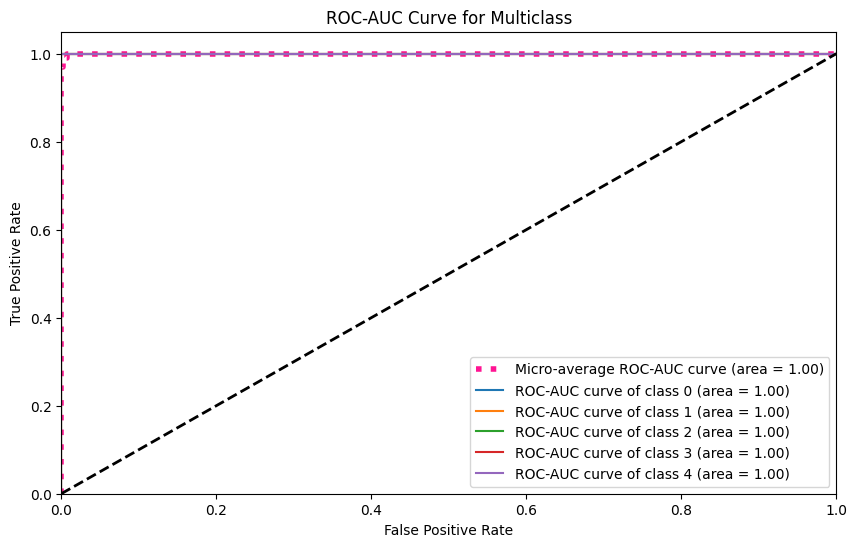

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Function to calculate and print ROC score for multiclass
def evaluate_roc_score_multiclass(model, test_data):
    y_true = []
    y_pred_prob = []

    for images, labels in test_data:
        y_true.extend(np.argmax(labels.numpy(), axis=1))
        y_pred_prob.extend(model.predict(images))

    # Convert labels to one-hot encoding
    y_true_onehot = label_binarize(y_true, classes=np.unique(y_true))

    # Convert to NumPy arrays
    y_true_onehot = np.array(y_true_onehot)
    y_pred_prob = np.array(y_pred_prob)

    # Calculate ROC-AUC score
    roc_score = roc_auc_score(y_true_onehot, y_pred_prob, multi_class='ovr')
    print(f'ROC Score: {roc_score}')

    # Plot ROC curve
    num_classes = len(np.unique(y_true))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_onehot[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_onehot.ravel(), y_pred_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC-AUC curve (area = {0:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label='ROC-AUC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve for Multiclass')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate ROC score and plot ROC curve for your VGG16 model
evaluate_roc_score_multiclass(model, test_data)


Cross Validation Score : 0.9895833134651184


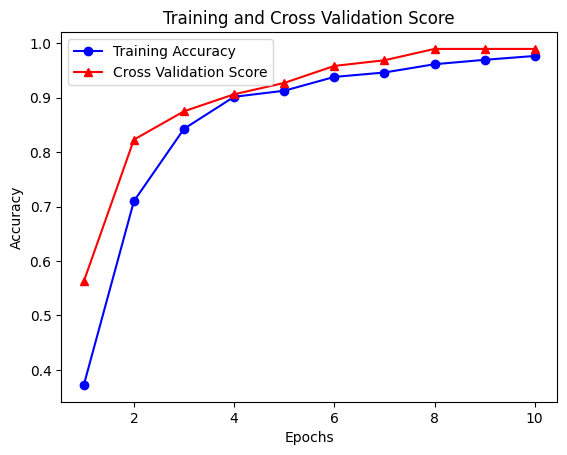

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

# Your model training code (assuming you've trained the model and have the 'history' object)

# Extract validation accuracy from the history
val_accuracy_vgg16 = history.history['val_accuracy'][-1]
print(f"Cross Validation Score : {val_accuracy_vgg16}")

# Plot learning curve
def plot_learning_curve(history):
    # Extracting training and validation accuracy values from the history object
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Extracting epochs
    epochs = range(1, len(train_accuracy) + 1)

    # Plotting the learning curve
    plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r^-', label='Cross Validation Score')
    plt.title('Training and Cross Validation Score')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plot learning curve
plot_learning_curve(history)


Misclassification Error for VGG16: 0.010416686534881592


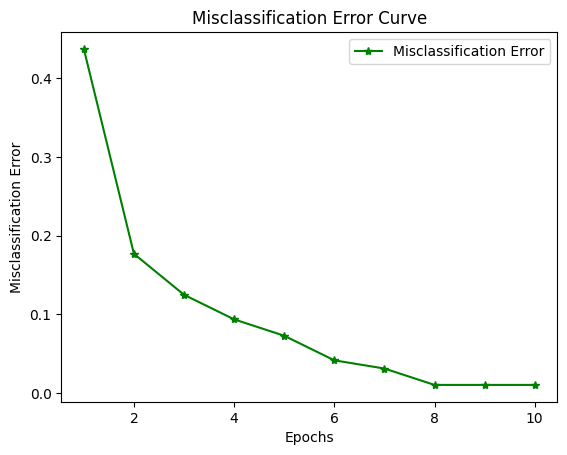

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

# Assuming you have trained your VGG16 model and loaded test_data

# Your model training code (assuming you've trained the model and have the 'history' object)

# Extract validation accuracy and misclassification error from the history
val_accuracy_vgg16 = history.history['val_accuracy'][-1]
misclassification_error_vgg16 = 1 - val_accuracy_vgg16
print(f"Misclassification Error for VGG16: {misclassification_error_vgg16}")

# Plot misclassification error curve
def plot_misclassification_error(history):
    # Extracting validation accuracy values from the history object
    val_accuracy = history.history['val_accuracy']

    # Calculating misclassification error
    misclassification_error = [1 - acc for acc in val_accuracy]

    # Extracting epochs
    epochs = range(1, len(val_accuracy) + 1)

    # Plotting the misclassification error curve
    plt.plot(epochs, misclassification_error, 'g*-', label='Misclassification Error')
    plt.title('Misclassification Error Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Misclassification Error')
    plt.legend()
    plt.show()

# Plot misclassification error curve
plot_misclassification_error(history)


# Validation accuracy, Precision, recall, f1-score, support

In [ ]:
model.load_weights('/content/best_model.h5')
_, accuracy = model.evaluate(test_data)
print(f"Validation accuracy: {round(accuracy * 100, 2)}%")


# Function to get predictions
def get_predictions(model, test_data):
    y_true = []
    y_pred = []

    for x_batch, y_batch in test_data:
        predictions = model.predict(x_batch)
        y_true.extend(np.argmax(y_batch, axis=1))
        y_pred.extend(np.argmax(predictions, axis=1))

    return np.array(y_true), np.array(y_pred)

# Get predictions for the model
y_true, y_pred = get_predictions(model, test_data)

# Print classification report
class_names = train_data.class_names
report = classification_report(y_true, y_pred, target_names=class_names)

# Print the report
print("Classification Report:\n", report)

3/3 [==============================] - 69s 21s/step - loss: 0.0527 - accuracy: 0.9896
Validation accuracy: 98.96%
1/1 [==============================] - 21s 21s/step
Classification Report:
               precision    recall  f1-score   support

      Amloki       1.00      1.00      1.00        20
      Arjuna       1.00      1.00      1.00        21
        Neem       1.00      1.00      1.00        20
    Thankuni       0.95      1.00      0.98        20
       Tulsi       1.00      0.93      0.97        15

    accuracy                           0.99        96
   macro avg       0.99      0.99      0.99        96
weighted avg       0.99      0.99      0.99        96



In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred)
# Assign values from confusion matrix
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

# Calculate Specificity and Sensitivity
specificity = TN / (TN + FP)
sensitivity = TP / (TP + FN)

# Print the results
print("True Positives:", TP)
print("False Positives:", FP)
print("True Negatives:", TN)
print("False Negatives:", FN)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

True Positives: 21
False Positives: 0
True Negatives: 20
False Negatives: 0
Specificity: 1.0
Sensitivity: 1.0


# Confusion Matrix

1/1 [==============================] - 20s 20s/step


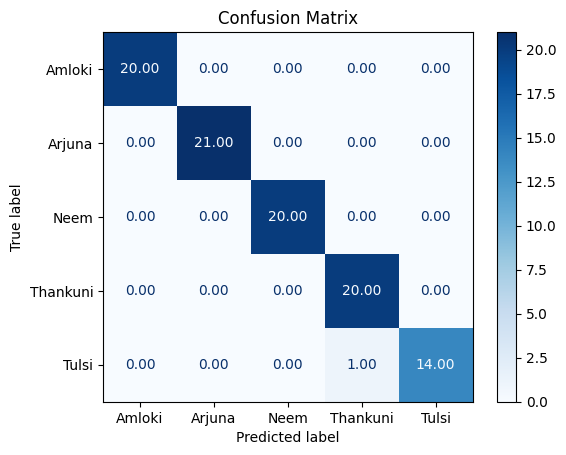

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to get predictions
def get_predictions(model, test_data):
    y_true = []
    y_pred = []

    for x_batch, y_batch in test_data:
        predictions = model.predict(x_batch)
        y_true.extend(np.argmax(y_batch, axis=1))
        y_pred.extend(np.argmax(predictions, axis=1))

    return np.array(y_true), np.array(y_pred)

# Get predictions for the model
y_true, y_pred = get_predictions(model, test_data)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title('Confusion Matrix')
plt.show()



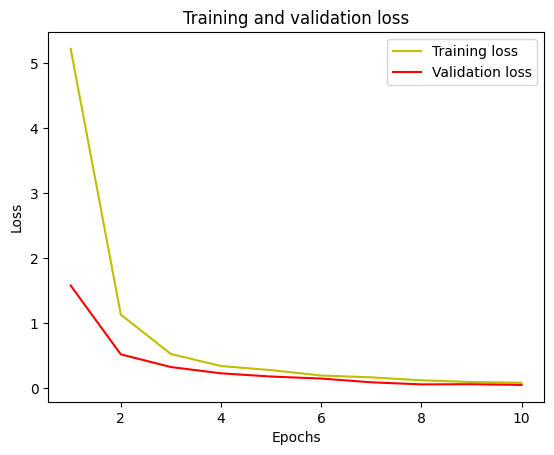

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

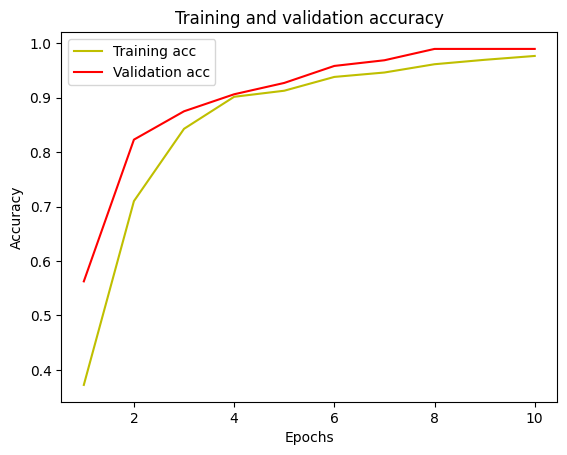

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Apply Resnet50 Model

In [ ]:

# Use ResNet50 as the base model
model_resnet50 = ResNet50(include_top=False, input_shape=(224, 224, 3))
model_resnet50.trainable = False

# Build the model
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = model_resnet50(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
outputs = layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)
model_net50 = tf.keras.Model(inputs, outputs)

# Compile the model
opt = Adam(learning_rate=1e-3)
model_net50.compile(
    optimizer=opt,
    loss="categorical_crossentropy",
    metrics=[tf.keras.metrics.CategoricalAccuracy(name="accuracy")]
)

# Model checkpoint callback
checkpoint = [ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=True,
    save_weights_only=True
)]

# Train the model
history = model_net50.fit(
    train_data_augmented,
    epochs=EPOCHS,
    validation_data=test_data,
    validation_steps=len(test_data),
    callbacks=checkpoint
)

94765736/94765736 [==============================] - 2s 0us/step
Epoch 1/10
31/31 [==============================] - ETA: 0s - loss: 0.8129 - accuracy: 0.7221
Epoch 1: val_accuracy improved from -inf to 0.95833, saving model to best_model.h5
31/31 [==============================] - 311s 9s/step - loss: 0.8129 - accuracy: 0.7221 - val_loss: 0.2468 - val_accuracy: 0.9583
Epoch 2/10
31/31 [==============================] - ETA: 0s - loss: 0.1564 - accuracy: 0.9736
Epoch 2: val_accuracy improved from 0.95833 to 0.98958, saving model to best_model.h5
31/31 [==============================] - 305s 9s/step - loss: 0.1564 - accuracy: 0.9736 - val_loss: 0.1159 - val_accuracy: 0.9896
Epoch 3/10
31/31 [==============================] - ETA: 0s - loss: 0.0912 - accuracy: 0.9848
Epoch 3: val_accuracy did not improve from 0.98958
31/31 [==============================] - 308s 9s/step - loss: 0.0912 - accuracy: 0.9848 - val_loss: 0.0827 - val_accuracy: 0.9792
Epoch 4/10
31/31 [=========================

In [ ]:
# Extract validation accuracy from the history
val_accuracy_resnet50 = history.history['accuracy'][-1]

# Print the validation accuracy
print(f"Accuracy for ResNet50: {val_accuracy_resnet50}")


# Function to get predictions for a specific model
def get_predictions(model_net50, test_data):
    y_true = []
    y_pred = []

    for x_batch, y_batch in test_data:
        predictions = model.predict(x_batch)
        y_true.extend(np.argmax(y_batch, axis=1))
        y_pred.extend(np.argmax(predictions, axis=1))

    return np.array(y_true), np.array(y_pred)

# Get predictions for the ResNet50 model
y_true_resnet50, y_pred_resnet50 = get_predictions(model_resnet50, test_data)

# Convert to integers if necessary
y_true_resnet50 = y_true_resnet50.astype(int)
y_pred_resnet50 = y_pred_resnet50.astype(int)

# Flatten the arrays to make them 1-dimensional
y_true_resnet50 = np.ravel(y_true_resnet50)
y_pred_resnet50 = np.ravel(y_pred_resnet50)

# Ensure the number of samples match
num_samples = min(len(y_true_resnet50), len(y_pred_resnet50))
y_true_resnet50 = y_true_resnet50[:num_samples]
y_pred_resnet50 = y_pred_resnet50[:num_samples]

# Create a list of model names for identification in the classification report
model_names = ['ResNet50']

# Ensure that target_names includes all class names
target_names = train_data.class_names

# Specify the labels parameter
labels = np.arange(len(target_names))

# Print classification report for all models together
report_all_models = classification_report(
    y_true_resnet50, y_pred_resnet50,
    target_names=target_names,
    labels=labels
)

# Print the combined report with accuracy
print("Combined Report for All Models:\n", report_all_models)


Accuracy for ResNet50: 0.9979715943336487
1/1 [==============================] - 21s 21s/step
Combined Report for All Models:
               precision    recall  f1-score   support

      Amloki       1.00      1.00      1.00        20
      Arjuna       1.00      1.00      1.00        21
        Neem       1.00      1.00      1.00        20
    Thankuni       0.95      1.00      0.98        20
       Tulsi       1.00      0.93      0.97        15

    accuracy                           0.99        96
   macro avg       0.99      0.99      0.99        96
weighted avg       0.99      0.99      0.99        96



1/1 [==============================] - 10s 10s/step


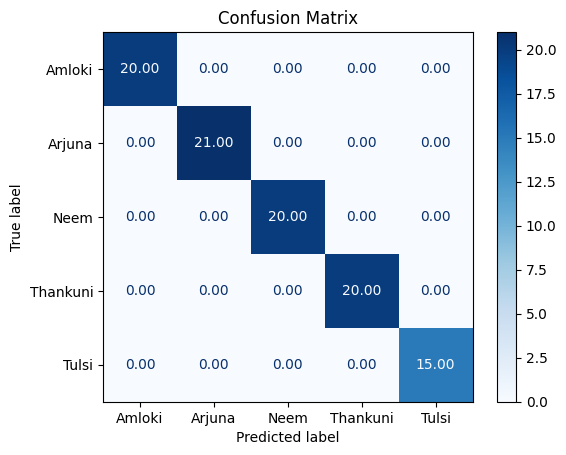

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to get predictions
def get_predictions(model_net50, test_data):
    y_true = []
    y_pred = []

    for x_batch, y_batch in test_data:
        predictions = model_net50.predict(x_batch)
        y_true.extend(np.argmax(y_batch, axis=1))
        y_pred.extend(np.argmax(predictions, axis=1))

    return np.array(y_true), np.array(y_pred)

# Get predictions for the model
y_true, y_pred = get_predictions(model_net50, test_data)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Function to calculate AUC score for multiclass
def evaluate_auc_score_multiclass(model_net50, test_data):
    y_true = []
    y_pred_prob = []

    for images, labels in test_data:
        y_true.extend(np.argmax(labels.numpy(), axis=1))
        y_pred_prob.extend(model_net50.predict(images))

    # Convert labels to one-hot encoding
    y_true_onehot = label_binarize(y_true, classes=np.unique(y_true))

    # Calculate AUC score
    auc_score = roc_auc_score(y_true_onehot, y_pred_prob, multi_class='ovr')

    print(f'AUC Score: {auc_score:.2f}')

# Evaluate AUC score for your model
evaluate_auc_score_multiclass(model_net50, test_data)

1/1 [==============================] - 7s 7s/step
AUC Score: 1.00


1/1 [==============================] - 5s 5s/step
ROC Score: 1.0


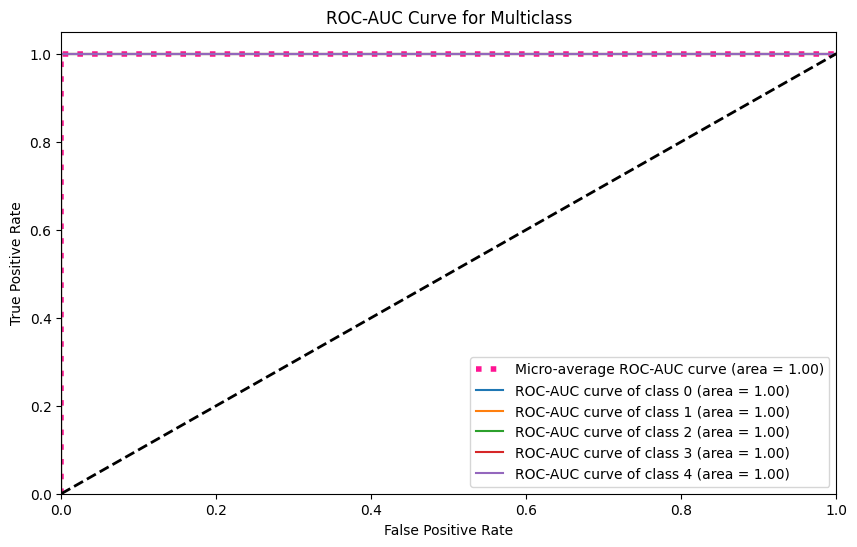

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Function to calculate and print ROC score for multiclass
def evaluate_roc_score_multiclass(model_net50, test_data):
    y_true = []
    y_pred_prob = []

    for images, labels in test_data:
        y_true.extend(np.argmax(labels.numpy(), axis=1))
        y_pred_prob.extend(model_net50.predict(images))

    # Convert labels to one-hot encoding
    y_true_onehot = label_binarize(y_true, classes=np.unique(y_true))

    # Convert to NumPy arrays
    y_true_onehot = np.array(y_true_onehot)
    y_pred_prob = np.array(y_pred_prob)

    # Calculate ROC-AUC score
    roc_score = roc_auc_score(y_true_onehot, y_pred_prob, multi_class='ovr')
    print(f'ROC Score: {roc_score}')

    # Plot ROC curve
    num_classes = len(np.unique(y_true))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_onehot[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_onehot.ravel(), y_pred_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC-AUC curve (area = {0:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label='ROC-AUC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve for Multiclass')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate ROC score and plot ROC curve for your VGG16 model
evaluate_roc_score_multiclass(model_net50, test_data)

Cross Validation Score : 1.0


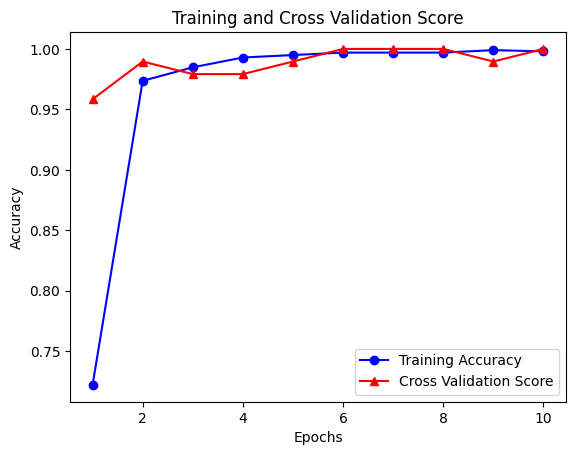

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

# Your model training code (assuming you've trained the model and have the 'history' object)

# Extract validation accuracy from the history
val_accuracy_vgg16 = history.history['val_accuracy'][-1]
print(f"Cross Validation Score : {val_accuracy_vgg16}")

# Plot learning curve
def plot_learning_curve(history):
    # Extracting training and validation accuracy values from the history object
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Extracting epochs
    epochs = range(1, len(train_accuracy) + 1)

    # Plotting the learning curve
    plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r^-', label='Cross Validation Score')
    plt.title('Training and Cross Validation Score')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plot learning curve
plot_learning_curve(history)

Misclassification Error for ResNet50: 0.0020284056663513184


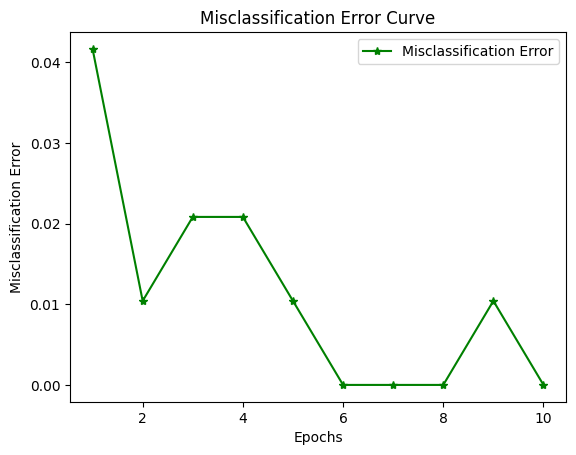

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

# Assuming you have trained your VGG16 model and loaded test_data

# Your model training code (assuming you've trained the model and have the 'history' object)

# Extract validation accuracy and misclassification error from the history
val_accuracy_vgg16 = history.history['accuracy'][-1]
misclassification_error_vgg16 = 1 - val_accuracy_vgg16
print(f"Misclassification Error for ResNet50: {misclassification_error_vgg16}")

# Plot misclassification error curve
def plot_misclassification_error(history):
    # Extracting validation accuracy values from the history object
    val_accuracy = history.history['val_accuracy']

    # Calculating misclassification error
    misclassification_error = [1 - acc for acc in val_accuracy]

    # Extracting epochs
    epochs = range(1, len(val_accuracy) + 1)

    # Plotting the misclassification error curve
    plt.plot(epochs, misclassification_error, 'g*-', label='Misclassification Error')
    plt.title('Misclassification Error Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Misclassification Error')
    plt.legend()
    plt.show()

# Plot misclassification error curve
plot_misclassification_error(history)

# Apply InceptionV3

In [ ]:

# Use InceptionV3 as the base model
model_inceptionv3 = InceptionV3(include_top=False, input_shape=(224, 224, 3))
model_inceptionv3.trainable = False

# Build the model
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = model_inceptionv3(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
outputs = layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)
model_inception = tf.keras.Model(inputs, outputs)

# Compile the model
opt = Adam(learning_rate=1e-3)
model_inception.compile(
    optimizer=opt,
    loss="categorical_crossentropy",
    metrics=[tf.keras.metrics.CategoricalAccuracy(name="accuracy")]
)

# Model checkpoint callback
checkpoint = [ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=True,
    save_weights_only=True
)]

# Train the model
history = model_inception.fit(
    train_data_augmented,
    epochs=EPOCHS,
    validation_data=test_data,
    validation_steps=len(test_data),
    callbacks=checkpoint
)

87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/10
31/31 [==============================] - ETA: 0s - loss: 10.9227 - accuracy: 0.3164
Epoch 1: val_accuracy improved from -inf to 0.45833, saving model to best_model.h5
31/31 [==============================] - 205s 6s/step - loss: 10.9227 - accuracy: 0.3164 - val_loss: 5.4087 - val_accuracy: 0.4583
Epoch 2/10
31/31 [==============================] - ETA: 0s - loss: 5.3370 - accuracy: 0.4402
Epoch 2: val_accuracy improved from 0.45833 to 0.54167, saving model to best_model.h5
31/31 [==============================] - 206s 6s/step - loss: 5.3370 - accuracy: 0.4402 - val_loss: 4.6160 - val_accuracy: 0.5417
Epoch 3/10
31/31 [==============================] - ETA: 0s - loss: 3.9186 - accuracy: 0.4828
Epoch 3: val_accuracy improved from 0.54167 to 0.58333, saving model to best_model.h5
31/31 [==============================] - 202s 6s/step - loss: 3.9186 - accuracy: 0.4828 - val_loss: 2.9874 - val_accuracy: 0.5833
Epoch 

In [ ]:
# Extract validation accuracy from the history
val_accuracy_inceptionv3 = history.history['accuracy'][-1]

# Print the validation accuracy
print(f"Accuracy for InceptionV3: {val_accuracy_inceptionv3}")


# Function to get predictions for a specific model
def get_predictions(model_inception, test_data):
    y_true = []
    y_pred = []

    for x_batch, y_batch in test_data:
        predictions = model_inception.predict(x_batch)
        y_true.extend(np.argmax(y_batch, axis=1))
        y_pred.extend(np.argmax(predictions, axis=1))

    return np.array(y_true), np.array(y_pred)

# Get predictions for the InceptionV3 model
y_true_inceptionv3, y_pred_inceptionv3 = get_predictions(model_inceptionv3, test_data)

# Convert to integers if necessary
y_true_inceptionv3 = y_true_inceptionv3.astype(int)
y_pred_inceptionv3 = y_pred_inceptionv3.astype(int)

# Flatten the arrays to make them 1-dimensional
y_true_inceptionv3 = np.ravel(y_true_inceptionv3)
y_pred_inceptionv3 = np.ravel(y_pred_inceptionv3)

# Ensure the number of samples match
num_samples_inceptionv3 = min(len(y_true_inceptionv3), len(y_pred_inceptionv3))
y_true_inceptionv3 = y_true_inceptionv3[:num_samples_inceptionv3]
y_pred_inceptionv3 = y_pred_inceptionv3[:num_samples_inceptionv3]

# Create a list of model names for identification in the classification report
model_names_inceptionv3 = ['InceptionV3']

# Ensure that target_names includes all class names
target_names_inceptionv3 = train_data.class_names

# Specify the labels parameter
labels_inceptionv3 = np.arange(len(target_names_inceptionv3))

# Print classification report for all models together
report_all_models_inceptionv3 = classification_report(
    y_true_inceptionv3, y_pred_inceptionv3,
    target_names=target_names_inceptionv3,
    labels=labels_inceptionv3
)

# Print the combined report with accuracy
print("Combined Report for All Models (InceptionV3):\n", report_all_models_inceptionv3)


Accuracy for InceptionV3: 0.6886409521102905
1/1 [==============================] - 11s 11s/step
Combined Report for All Models (InceptionV3):
               precision    recall  f1-score   support

      Amloki       0.17      0.55      0.27        20
      Arjuna       0.08      0.05      0.06        21
        Neem       0.29      0.10      0.15        20
    Thankuni       0.20      0.05      0.08        20
       Tulsi       0.00      0.00      0.00        15

    accuracy                           0.16        96
   macro avg       0.15      0.15      0.11        96
weighted avg       0.16      0.16      0.12        96



1/1 [==============================] - 3s 3s/step


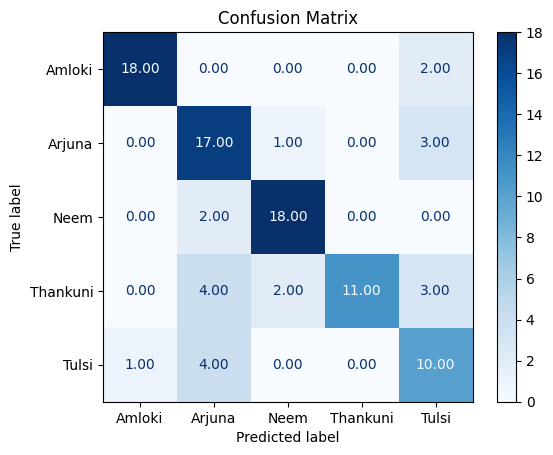

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to get predictions
def get_predictions(model_inception, test_data):
    y_true = []
    y_pred = []

    for x_batch, y_batch in test_data:
        predictions = model_inception.predict(x_batch)
        y_true.extend(np.argmax(y_batch, axis=1))
        y_pred.extend(np.argmax(predictions, axis=1))

    return np.array(y_true), np.array(y_pred)

# Get predictions for the model
y_true, y_pred = get_predictions(model_inception, test_data)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Function to calculate AUC score for multiclass
def evaluate_auc_score_multiclass(model, test_data):
    y_true = []
    y_pred_prob = []

    for images, labels in test_data:
        y_true.extend(np.argmax(labels.numpy(), axis=1))
        y_pred_prob.extend(model.predict(images))

    # Convert labels to one-hot encoding
    y_true_onehot = label_binarize(y_true, classes=np.unique(y_true))

    # Calculate AUC score
    auc_score = roc_auc_score(y_true_onehot, y_pred_prob, multi_class='ovr')

    print(f'AUC Score: {auc_score:.2f}')

# Evaluate AUC score for your model
evaluate_auc_score_multiclass(model, test_data)

1/1 [==============================] - 21s 21s/step
AUC Score: 1.00


1/1 [==============================] - 21s 21s/step
ROC Score: 0.9997038119991336


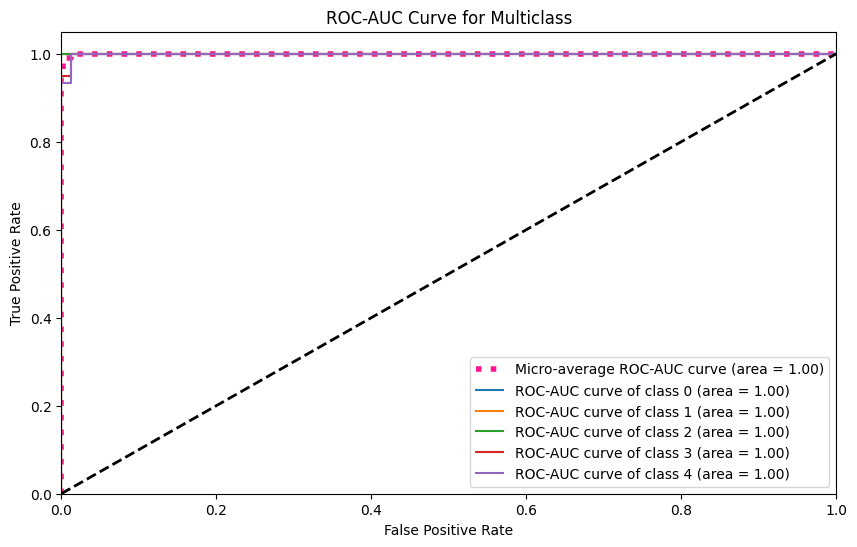

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Function to calculate and print ROC score for multiclass
def evaluate_roc_score_multiclass(model, test_data):
    y_true = []
    y_pred_prob = []

    for images, labels in test_data:
        y_true.extend(np.argmax(labels.numpy(), axis=1))
        y_pred_prob.extend(model.predict(images))

    # Convert labels to one-hot encoding
    y_true_onehot = label_binarize(y_true, classes=np.unique(y_true))

    # Convert to NumPy arrays
    y_true_onehot = np.array(y_true_onehot)
    y_pred_prob = np.array(y_pred_prob)

    # Calculate ROC-AUC score
    roc_score = roc_auc_score(y_true_onehot, y_pred_prob, multi_class='ovr')
    print(f'ROC Score: {roc_score}')

    # Plot ROC curve
    num_classes = len(np.unique(y_true))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_onehot[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_onehot.ravel(), y_pred_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC-AUC curve (area = {0:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label='ROC-AUC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve for Multiclass')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate ROC score and plot ROC curve for your VGG16 model
evaluate_roc_score_multiclass(model, test_data)

Cross Validation Score : 0.7708333134651184


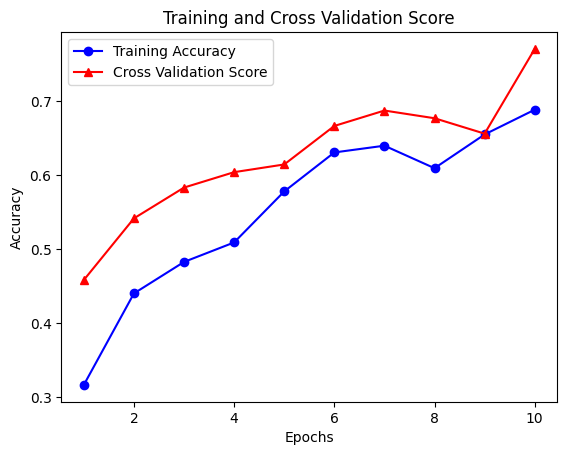

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

# Your model training code (assuming you've trained the model and have the 'history' object)

# Extract validation accuracy from the history
val_accuracy_vgg16 = history.history['val_accuracy'][-1]
print(f"Cross Validation Score : {val_accuracy_vgg16}")

# Plot learning curve
def plot_learning_curve(history):
    # Extracting training and validation accuracy values from the history object
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Extracting epochs
    epochs = range(1, len(train_accuracy) + 1)

    # Plotting the learning curve
    plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r^-', label='Cross Validation Score')
    plt.title('Training and Cross Validation Score')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plot learning curve
plot_learning_curve(history)

Misclassification Error for InceptionV3: 0.2291666865348816


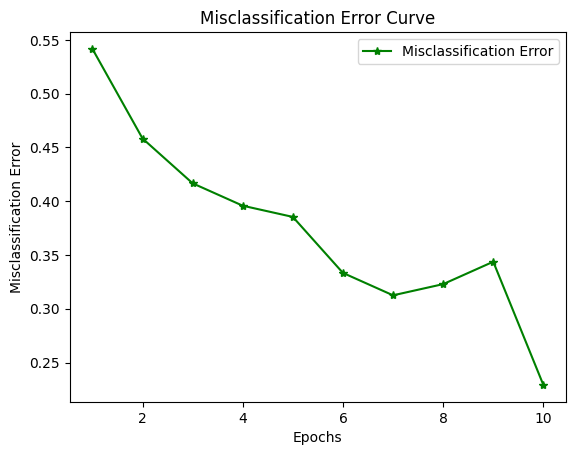

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

# Assuming you have trained your VGG16 model and loaded test_data

# Your model training code (assuming you've trained the model and have the 'history' object)

# Extract validation accuracy and misclassification error from the history
val_accuracy_vgg16 = history.history['val_accuracy'][-1]
misclassification_error_vgg16 = 1 - val_accuracy_vgg16
print(f"Misclassification Error for InceptionV3: {misclassification_error_vgg16}")

# Plot misclassification error curve
def plot_misclassification_error(history):
    # Extracting validation accuracy values from the history object
    val_accuracy = history.history['val_accuracy']

    # Calculating misclassification error
    misclassification_error = [1 - acc for acc in val_accuracy]

    # Extracting epochs
    epochs = range(1, len(val_accuracy) + 1)

    # Plotting the misclassification error curve
    plt.plot(epochs, misclassification_error, 'g*-', label='Misclassification Error')
    plt.title('Misclassification Error Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Misclassification Error')
    plt.legend()
    plt.show()

# Plot misclassification error curve
plot_misclassification_error(history)

# Apply MobileNetV2

In [ ]:
# Use MobileNetV2 as the base model
model_mobilenetv2 = MobileNetV2(include_top=False, input_shape=(224, 224, 3))
model_mobilenetv2.trainable = False

# Build the model
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = model_mobilenetv2(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
outputs = layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
opt = Adam(learning_rate=1e-3)
model.compile(
    optimizer=opt,
    loss="categorical_crossentropy",
    metrics=[tf.keras.metrics.CategoricalAccuracy(name="accuracy")]
)

# Model checkpoint callback
checkpoint = [ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=True,
    save_weights_only=True
)]

# Train the model
history = model.fit(
    train_data_augmented,
    epochs=EPOCHS,
    validation_data=test_data,
    validation_steps=len(test_data),
    callbacks=checkpoint
)

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
31/31 [==============================] - ETA: 0s - loss: 1.4913 - accuracy: 0.3783
Epoch 1: val_accuracy improved from -inf to 0.56250, saving model to best_model.h5
31/31 [==============================] - 118s 3s/step - loss: 1.4913 - accuracy: 0.3783 - val_loss: 1.2117 - val_accuracy: 0.5625
Epoch 2/10
31/31 [==============================] - ETA: 0s - loss: 1.0403 - accuracy: 0.6471
Epoch 2: val_accuracy improved from 0.56250 to 0.66667, saving model to best_model.h5
31/31 [==============================] - 121s 3s/step - loss: 1.0403 - accuracy: 0.6471 - val_loss: 0.9803 - val_accuracy: 0.6667
Epoch 3/10
31/31 [==============================] - ETA: 0s - loss: 0.8569 - accuracy: 0.7130
Epoch 3: val_accuracy did not improve from 0.66667
31/31 [==============================] - 115s 3s/step - loss: 0.8569 - accuracy: 0.7130 - val_loss: 0.8417 - val_accuracy: 0.6667
Epoch 4/10
31/31 [===========================

In [ ]:
# Extract validation accuracy from the history
val_accuracy_mobilenetv2 = history.history['val_accuracy'][-1]

# Print the validation accuracy
print(f"Accuracy for MobileNetV2: {val_accuracy_mobilenetv2}")


# Function to get predictions for a specific model
def get_predictions(model, test_data):
    y_true = []
    y_pred = []

    for x_batch, y_batch in test_data:
        predictions = model.predict(x_batch)
        y_true.extend(np.argmax(y_batch, axis=1))
        y_pred.extend(np.argmax(predictions, axis=1))

    return np.array(y_true), np.array(y_pred)

# Get predictions for the MobileNetV2 model
y_true_mobilenetv2, y_pred_mobilenetv2 = get_predictions(model_mobilenetv2, test_data)

# Convert to integers if necessary
y_true_mobilenetv2 = y_true_mobilenetv2.astype(int)
y_pred_mobilenetv2 = y_pred_mobilenetv2.astype(int)

# Flatten the arrays to make them 1-dimensional
y_true_mobilenetv2 = np.ravel(y_true_mobilenetv2)
y_pred_mobilenetv2 = np.ravel(y_pred_mobilenetv2)

# Ensure the number of samples match
num_samples_mobilenetv2 = min(len(y_true_mobilenetv2), len(y_pred_mobilenetv2))
y_true_mobilenetv2 = y_true_mobilenetv2[:num_samples_mobilenetv2]
y_pred_mobilenetv2 = y_pred_mobilenetv2[:num_samples_mobilenetv2]

# Create a list of model names for identification in the classification report
model_names_mobilenetv2 = ['MobileNetV2']

# Ensure that target_names includes all class names
target_names_mobilenetv2 = train_data.class_names

# Specify the labels parameter
labels_mobilenetv2 = np.arange(len(target_names_mobilenetv2))

# Print classification report for all models together
report_all_models_mobilenetv2 = classification_report(
    y_true_mobilenetv2, y_pred_mobilenetv2,
    target_names=target_names_mobilenetv2,
    labels=labels_mobilenetv2
)

# Print the combined report with accuracy
print("Combined Report for All Models (MobileNetV2):\n", report_all_models_mobilenetv2)


Accuracy for MobileNetV2: 0.8125
1/1 [==============================] - 2s 2s/step
Combined Report for All Models (MobileNetV2):
               precision    recall  f1-score   support

      Amloki       0.17      0.55      0.27        20
      Arjuna       0.07      0.05      0.06        21
        Neem       0.40      0.10      0.16        20
    Thankuni       0.00      0.00      0.00        20
       Tulsi       0.12      0.07      0.09        15

   micro avg       0.16      0.16      0.16        96
   macro avg       0.15      0.15      0.11        96
weighted avg       0.15      0.16      0.11        96



1/1 [==============================] - 1s 1s/step


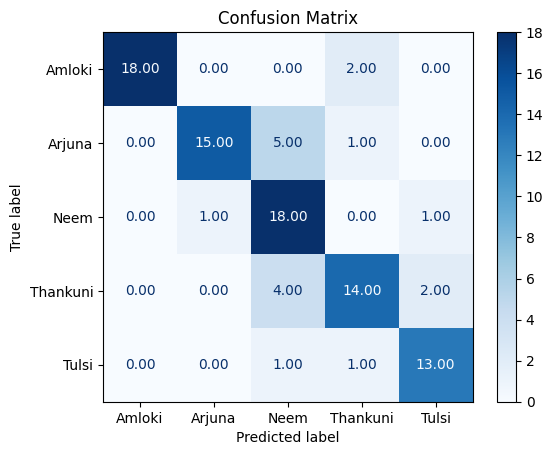

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to get predictions
def get_predictions(model, test_data):
    y_true = []
    y_pred = []

    for x_batch, y_batch in test_data:
        predictions = model.predict(x_batch)
        y_true.extend(np.argmax(y_batch, axis=1))
        y_pred.extend(np.argmax(predictions, axis=1))

    return np.array(y_true), np.array(y_pred)

# Get predictions for the model
y_true, y_pred = get_predictions(model, test_data)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Function to calculate AUC score for multiclass
def evaluate_auc_score_multiclass(model, test_data):
    y_true = []
    y_pred_prob = []

    for images, labels in test_data:
        y_true.extend(np.argmax(labels.numpy(), axis=1))
        y_pred_prob.extend(model.predict(images))

    # Convert labels to one-hot encoding
    y_true_onehot = label_binarize(y_true, classes=np.unique(y_true))

    # Calculate AUC score
    auc_score = roc_auc_score(y_true_onehot, y_pred_prob, multi_class='ovr')

    print(f'AUC Score: {auc_score:.2f}')

# Evaluate AUC score for your model
evaluate_auc_score_multiclass(model, test_data)

1/1 [==============================] - 1s 1s/step
AUC Score: 0.98


1/1 [==============================] - 1s 1s/step
ROC Score: 0.9779407314582753


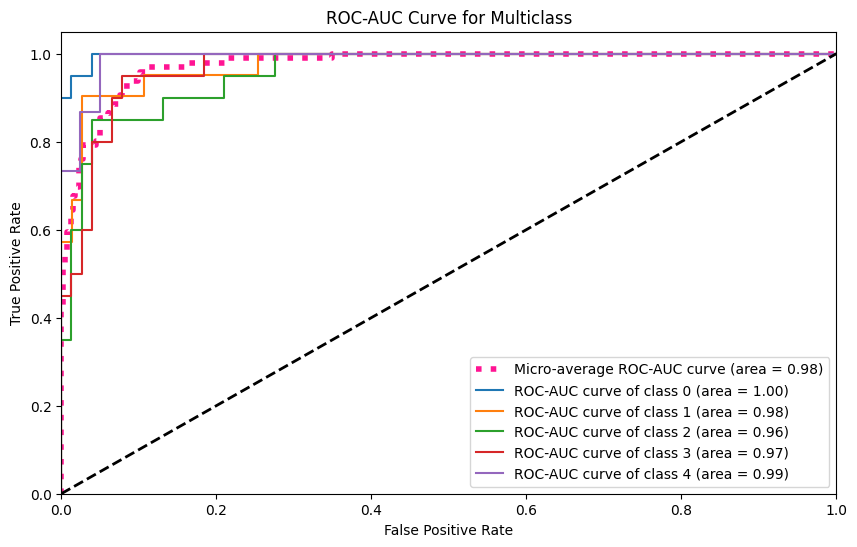

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Function to calculate and print ROC score for multiclass
def evaluate_roc_score_multiclass(model, test_data):
    y_true = []
    y_pred_prob = []

    for images, labels in test_data:
        y_true.extend(np.argmax(labels.numpy(), axis=1))
        y_pred_prob.extend(model.predict(images))

    # Convert labels to one-hot encoding
    y_true_onehot = label_binarize(y_true, classes=np.unique(y_true))

    # Convert to NumPy arrays
    y_true_onehot = np.array(y_true_onehot)
    y_pred_prob = np.array(y_pred_prob)

    # Calculate ROC-AUC score
    roc_score = roc_auc_score(y_true_onehot, y_pred_prob, multi_class='ovr')
    print(f'ROC Score: {roc_score}')

    # Plot ROC curve
    num_classes = len(np.unique(y_true))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_onehot[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_onehot.ravel(), y_pred_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC-AUC curve (area = {0:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label='ROC-AUC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve for Multiclass')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate ROC score and plot ROC curve for your VGG16 model
evaluate_roc_score_multiclass(model, test_data)

Cross Validation Score : 0.8125


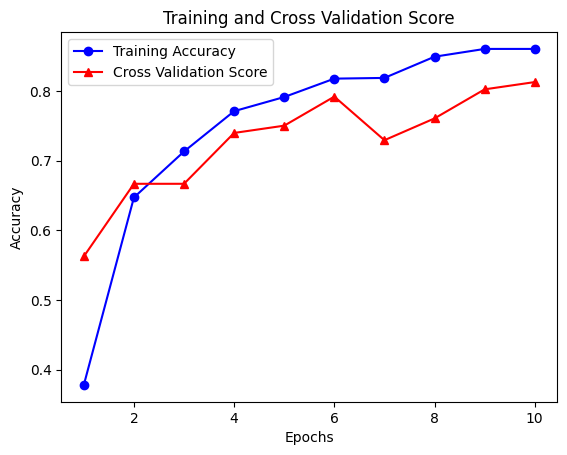

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

# Your model training code (assuming you've trained the model and have the 'history' object)

# Extract validation accuracy from the history
val_accuracy_vgg16 = history.history['val_accuracy'][-1]
print(f"Cross Validation Score : {val_accuracy_vgg16}")

# Plot learning curve
def plot_learning_curve(history):
    # Extracting training and validation accuracy values from the history object
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Extracting epochs
    epochs = range(1, len(train_accuracy) + 1)

    # Plotting the learning curve
    plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r^-', label='Cross Validation Score')
    plt.title('Training and Cross Validation Score')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plot learning curve
plot_learning_curve(history)

Misclassification Error for MobileNetV2: 0.1875


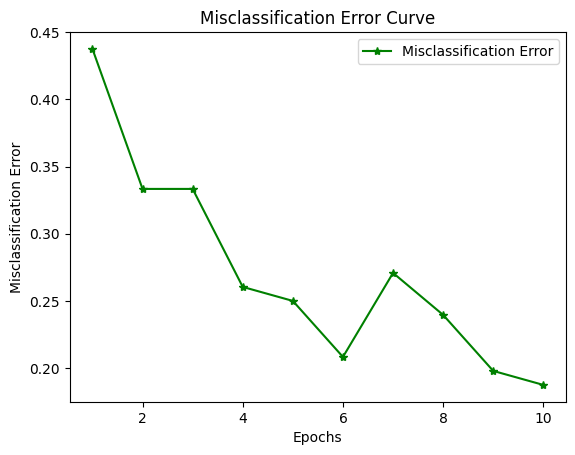

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

# Assuming you have trained your VGG16 model and loaded test_data

# Your model training code (assuming you've trained the model and have the 'history' object)

# Extract validation accuracy and misclassification error from the history
val_accuracy_vgg16 = history.history['val_accuracy'][-1]
misclassification_error_vgg16 = 1 - val_accuracy_vgg16
print(f"Misclassification Error for MobileNetV2: {misclassification_error_vgg16}")

# Plot misclassification error curve
def plot_misclassification_error(history):
    # Extracting validation accuracy values from the history object
    val_accuracy = history.history['val_accuracy']

    # Calculating misclassification error
    misclassification_error = [1 - acc for acc in val_accuracy]

    # Extracting epochs
    epochs = range(1, len(val_accuracy) + 1)

    # Plotting the misclassification error curve
    plt.plot(epochs, misclassification_error, 'g*-', label='Misclassification Error')
    plt.title('Misclassification Error Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Misclassification Error')
    plt.legend()
    plt.show()

# Plot misclassification error curve
plot_misclassification_error(history)

# Calculate MSE, RMSE, SSIM and PSNR

In [ ]:
import cv2
import numpy as np
from skimage import metrics

def mse_rmse_ssim_psnr_calculate(img):
  # Convert the image to LAB color space
  lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
  l, a, b = cv2.split(lab_img)

  # Apply CLAHE to the L channel
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
  cl = clahe.apply(l)

  # Merge the CLAHE-processed L channel with the A and B channels
  lab_img_clahe = cv2.merge((cl, a, b))

  # Convert the LAB image back to BGR color space
  process_img = cv2.cvtColor(lab_img_clahe, cv2.COLOR_LAB2BGR)

  # Calculate MSE, RMSE, SSIM and PSNR
  mse = metrics.mean_squared_error(img, process_img)
  rmse = np.sqrt(metrics.mean_squared_error(img, process_img))
  ssim_score = metrics.structural_similarity(img, process_img, data_range=img.max() - img.min(), multichannel=True)
  psnr = metrics.peak_signal_noise_ratio(img, process_img, data_range=img.max() - img.min())

  print("MSE : ", mse)
  print("RMSE : ", rmse)
  print("SSIM : ", ssim_score)
  print("PSNR : ", psnr)

In [ ]:
# Read the image
img_1 = cv2.imread("/content/drive/MyDrive/Academic/Medicinal Leaf/test/Amloki/IMG_1039.jpg")
mse_rmse_ssim_psnr_calculate(img_1)

<ipython-input-45-4835536ac6c5>:23: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = metrics.structural_similarity(img, process_img, data_range=img.max() - img.min(), multichannel=True)


MSE :  765.317305635603
RMSE :  27.664368881931917
SSIM :  0.8325672571665881
PSNR :  19.292388270013177


In [ ]:
# Read the image
img_2 = cv2.imread("/content/drive/MyDrive/Academic/Medicinal Leaf/test/Amloki/IMG_1065.jpg")
mse_rmse_ssim_psnr_calculate(img_2)

<ipython-input-7-34718e799c33>:25: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = metrics.structural_similarity(img, process_img, data_range=img.max() - img.min(), multichannel=True)


MSE :  875.3887445136877
RMSE :  29.58696916741706
SSIM :  0.8765122817967045
PSNR :  18.708794025833008


In [ ]:
# Read the image
img_3 = cv2.imread("/content/drive/MyDrive/Academic/Medicinal Leaf/test/Arjuna/IMG_0823.jpg")
mse_rmse_ssim_psnr_calculate(img_3)

<ipython-input-7-34718e799c33>:25: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = metrics.structural_similarity(img, process_img, data_range=img.max() - img.min(), multichannel=True)


MSE :  604.6345084506925
RMSE :  24.589316957790682
SSIM :  0.8656526265033465
PSNR :  20.315874307253626


In [ ]:
# Read the image
img_4 = cv2.imread("/content/drive/MyDrive/Academic/Medicinal Leaf/test/Arjuna/IMG_0872.jpg")
mse_rmse_ssim_psnr_calculate(img_4)

<ipython-input-7-34718e799c33>:25: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = metrics.structural_similarity(img, process_img, data_range=img.max() - img.min(), multichannel=True)


MSE :  828.3309765537516
RMSE :  28.780739680448654
SSIM :  0.8407247577984065
PSNR :  18.948764581775663


In [ ]:
# Read the image
img_5 = cv2.imread("/content/drive/MyDrive/Academic/Medicinal Leaf/test/Neem/IMG_8572.jpg")
mse_rmse_ssim_psnr_calculate(img_5)

<ipython-input-7-34718e799c33>:25: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = metrics.structural_similarity(img, process_img, data_range=img.max() - img.min(), multichannel=True)


MSE :  641.7496496010313
RMSE :  25.33277816586707
SSIM :  0.8684037768397662
PSNR :  20.057147206516287


In [ ]:
# Read the image
img_6 = cv2.imread("/content/drive/MyDrive/Academic/Medicinal Leaf/test/Neem/IMG_8577.jpg")
mse_rmse_ssim_psnr_calculate(img_6)

<ipython-input-7-34718e799c33>:25: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = metrics.structural_similarity(img, process_img, data_range=img.max() - img.min(), multichannel=True)


MSE :  673.1604950847366
RMSE :  25.945336673181494
SSIM :  0.8308654047402388
PSNR :  19.849617397051308


In [ ]:
# Read the image
img_7 = cv2.imread("/content/drive/MyDrive/Academic/Medicinal Leaf/test/Thankuni/IMG_0669.jpg")
mse_rmse_ssim_psnr_calculate(img_7)

<ipython-input-7-34718e799c33>:25: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = metrics.structural_similarity(img, process_img, data_range=img.max() - img.min(), multichannel=True)


MSE :  556.8589809686091
RMSE :  23.597859669228672
SSIM :  0.8325042263965847
PSNR :  20.67335132554529


In [ ]:
# Read the image
img_8 = cv2.imread("/content/drive/MyDrive/Academic/Medicinal Leaf/test/Thankuni/IMG_0677.jpg")
mse_rmse_ssim_psnr_calculate(img_8)

<ipython-input-7-34718e799c33>:25: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = metrics.structural_similarity(img, process_img, data_range=img.max() - img.min(), multichannel=True)


MSE :  582.5656505834716
RMSE :  24.136396801997424
SSIM :  0.8635770195503767
PSNR :  20.47735486827273


In [ ]:
# Read the image
img_9 = cv2.imread("/content/drive/MyDrive/Academic/Medicinal Leaf/test/Tulsi/IMG_8621.jpg")
mse_rmse_ssim_psnr_calculate(img_9)

<ipython-input-7-34718e799c33>:25: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = metrics.structural_similarity(img, process_img, data_range=img.max() - img.min(), multichannel=True)


MSE :  631.2600743052494
RMSE :  25.124889538170102
SSIM :  0.8284567832577058
PSNR :  20.128720387625524


In [ ]:
# Read the image
img_10 = cv2.imread("/content/drive/MyDrive/Academic/Medicinal Leaf/test/Tulsi/IMG_8657.jpg")
mse_rmse_ssim_psnr_calculate(img_10)

<ipython-input-7-34718e799c33>:25: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = metrics.structural_similarity(img, process_img, data_range=img.max() - img.min(), multichannel=True)


MSE :  632.6245854646514
RMSE :  25.152029450218354
SSIM :  0.8580494547295577
PSNR :  20.119342951279855
